In [1]:
%matplotlib inline

In [2]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from scipy.stats import skew, kurtosis

In [3]:
# Reading data

df = pd.read_excel(r'C:\Users\anant\OneDrive\Desktop\MBAN\MBAN 6110\Datasets\sfd_data_original.xlsx')

In [3]:
# Check for missing values

df.isnull().sum()

OBJECTID             0
OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DOW              0
OCC_DOY              0
OCC_DAY              0
OCC_HOUR             0
OCC_TIME_RANGE       0
DIVISION             0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
VICTIMS              0
dtype: int64

In [4]:
# Basic statistics for numeric columns

df.describe()

,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,HOOD_158,LONG_WGS84,LAT_WGS84,VICTIMS
count,5643.000000,5643.000000,5643.000000,5643.000000,5643.000000,5643.000000,5643.000000,5643.000000,5643.000000,5643.000000,5643.000000
mean,2874.332624,2014.532164,187.136807,15.905369,12.079745,0.122984,0.486443,79.864257,-79.415076,43.719079,0.609428
std,1643.956540,5.448039,100.372513,8.824548,8.685902,0.350381,0.781489,55.402865,0.116379,0.048917,0.842548
min,1.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-79.625565,43.587343,0.000000
25%,1453.500000,2010.000000,106.000000,8.000000,3.000000,0.000000,0.000000,25.000000,-79.512482,43.678879,0.000000
50%,2886.000000,2016.000000,192.000000,16.000000,15.000000,0.000000,0.000000,73.000000,-79.438373,43.721312,0.000000
75%,4296.500000,2019.000000,268.000000,23.000000,20.000000,0.000000,1.000000,136.000000,-79.327105,43.755510,1.000000
max,5707.000000,2022.000000,366.000000,31.000000,23.000000,3.000000,24.000000,174.000000,-79.122053,43.838274,26.000000


Here are some observations about the dataset:

* There are no missing values in the dataset.

* The dataset has a mix of numerical (integers and floats) and object data types. OCC_DATE is currently an object type, we will need to convert it to a datetime format for analyses.

From the basic statistics:

* There are 5643 unique incidents in the dataset.

* The OCC_YEAR ranges from 2004 to 2022

* The OCC_DOY, OCC_DAY, and OCC_HOUR provide detailed time information about the incidents.

* DEATH, INJURIES, and VICTIMS have a minimum value of 0, suggesting there are incidents where no one was injured or killed. The maximum values indicate that there have been incidents with significant numbers of victims.

* HOOD_158 ranges from 1 to 174, suggesting there are at least 174 different neighborhoods in the dataset.

* The LONG_WGS84 and LAT_WGS84 columns provide geographic information about the incidents.

Let's do some EDA

In [4]:
# Set the style for seaborn

sns.set_style("whitegrid")

# Create a figure instance and set the figure size

fig = plt.figure(figsize=(20, 15))


<Figure size 2000x1500 with 0 Axes>

In [5]:
# Create a list of numeric columns for univariate analysis

numeric_columns = ['OCC_YEAR', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR', 'DEATH', 'INJURIES', 'VICTIMS']

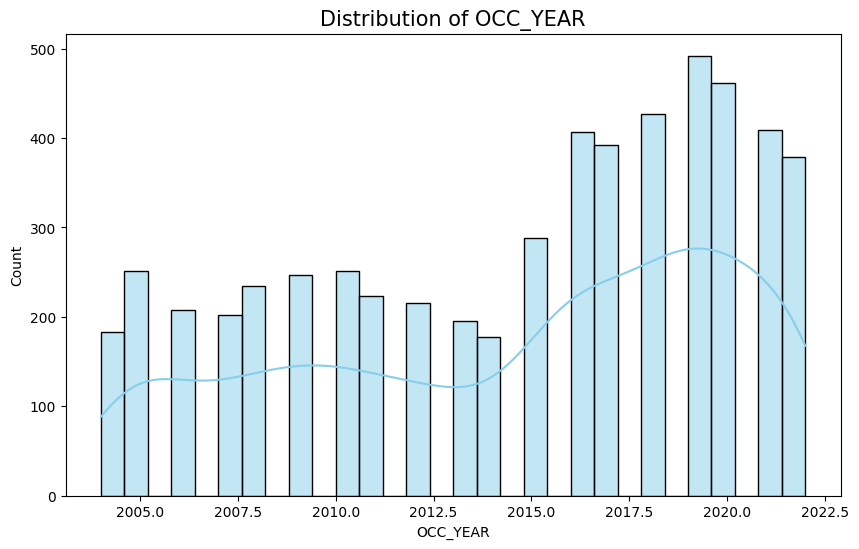

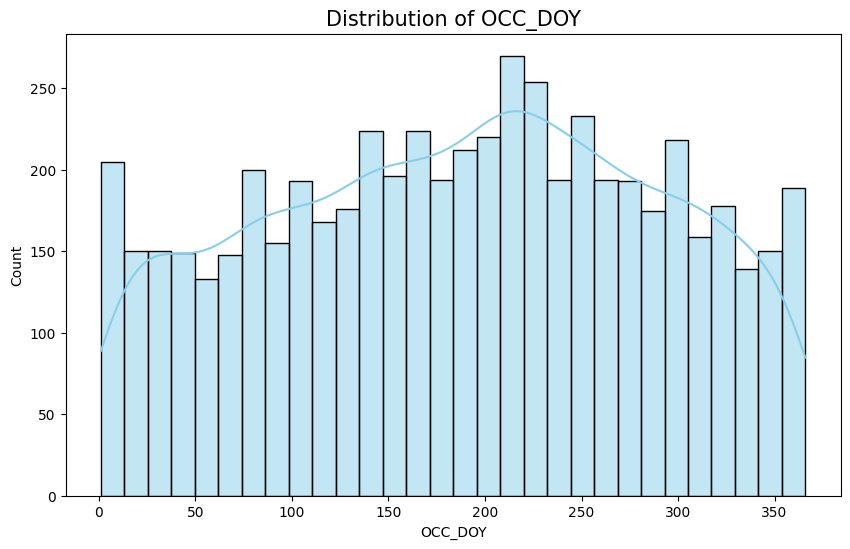

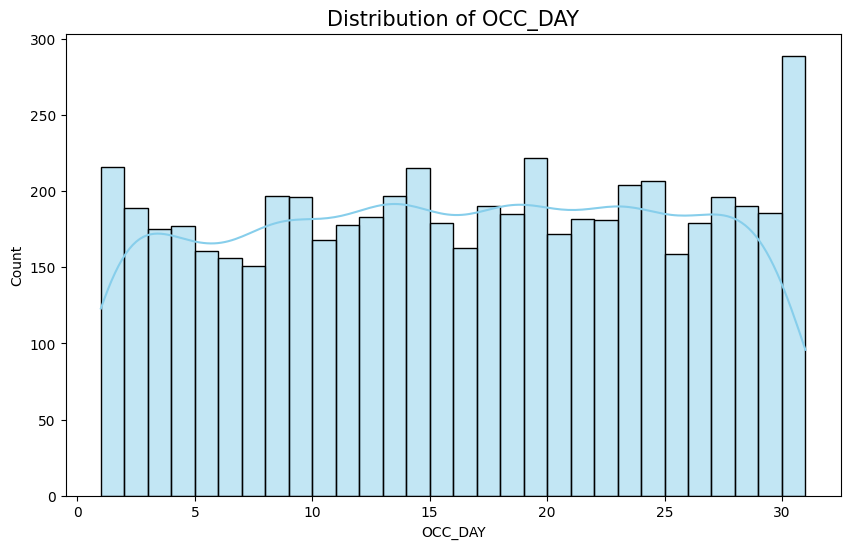

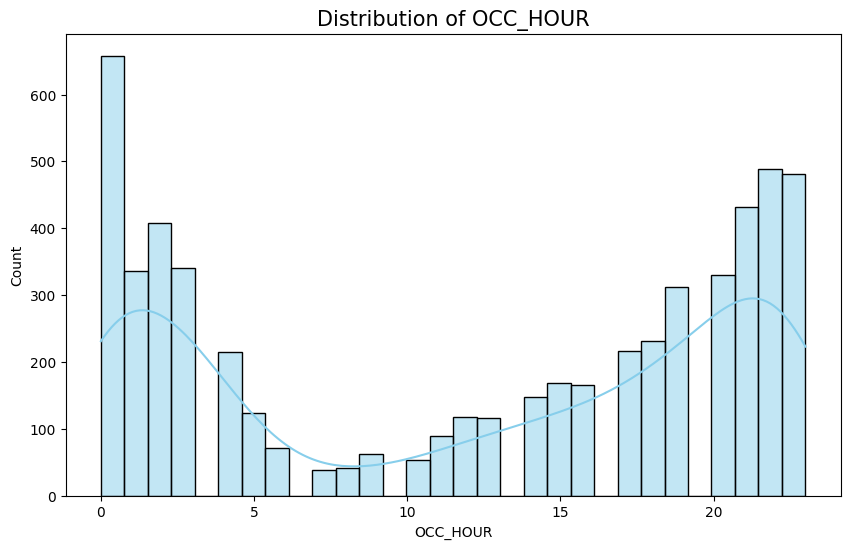

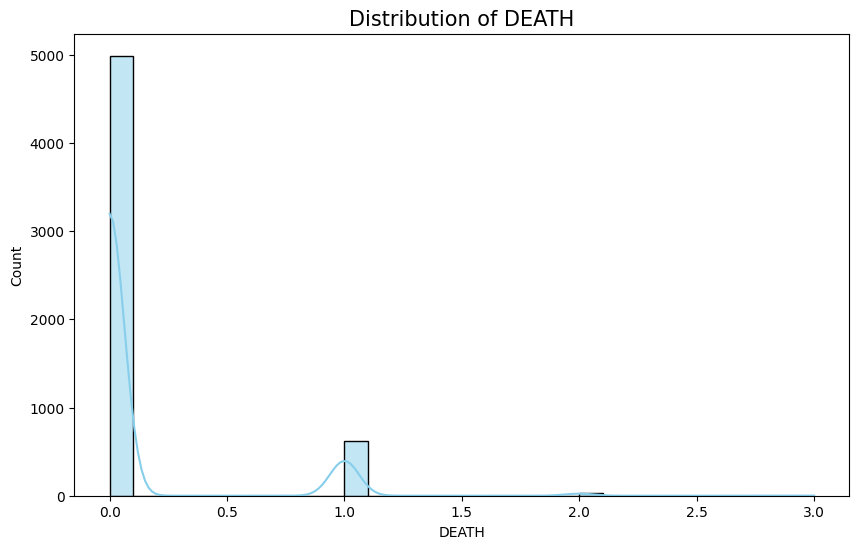

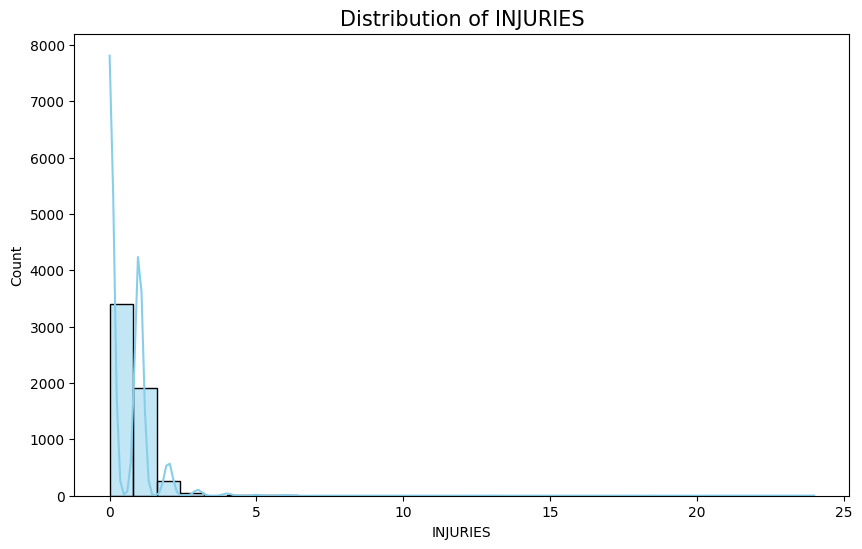

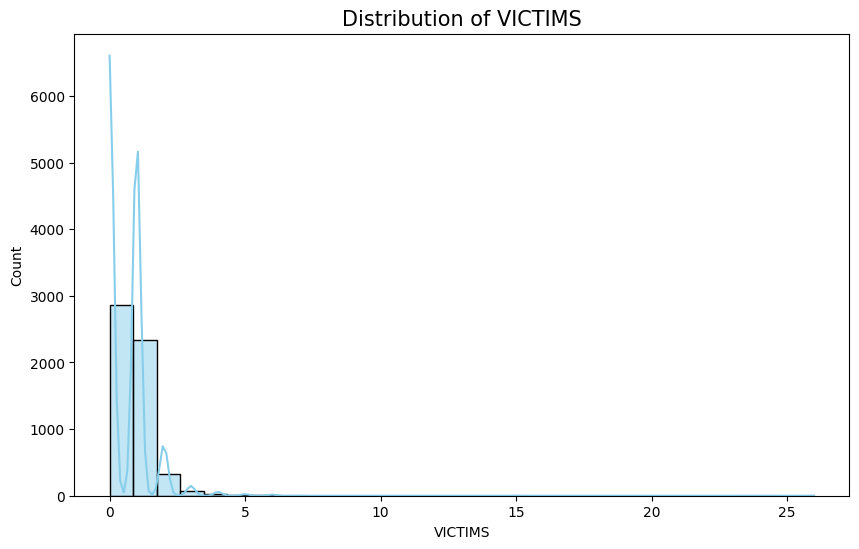

In [6]:
# Plot histograms for numeric columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.show()

* OCC_YEAR: This histogram shows that the frequency of incidents has been generally increasing over the years, with a noticeable increase after 2015.

* OCC_DOY: This histogram suggests that the distribution of incidents throughout the year is roughly uniform, meaning that incidents occur fairly evenly throughout the year. There doesn't appear to be a specific time of the year when incidents are significantly more or less likely to occur.

* OCC_HOUR: This histogram shows a clear pattern in the distribution of incidents throughout the day. Incidents are less common in the early morning hours (from around 1 to 7), start to increase in the late morning and afternoon, and peak in the evening and late night (from around 19 to 23).

* DEATH: This histogram shows that most incidents do not result in a death, with a very long tail extending to the right. This indicates that there are a few incidents with a large number of deaths, but these are much less common.

* INJURIES: This histogram shows that most incidents result in a small number of injuries, again with a long tail extending to the right. This indicates that there are a few incidents with a large number of injuries, but these are much less common.

* VICTIMS: This histogram shows that the majority of incidents involve a small number of victims, with a long tail extending to the right. This indicates that there are a few incidents with a large number of victims, which are much less common.

In [21]:
# Create a figure instance and set the figure size
fig = plt.figure(figsize=(20, 20))

# List of categorical columns
categorical_columns = ['OCC_MONTH', 'OCC_DOW', 'OCC_TIME_RANGE', 'DIVISION']

<Figure size 2000x2000 with 0 Axes>

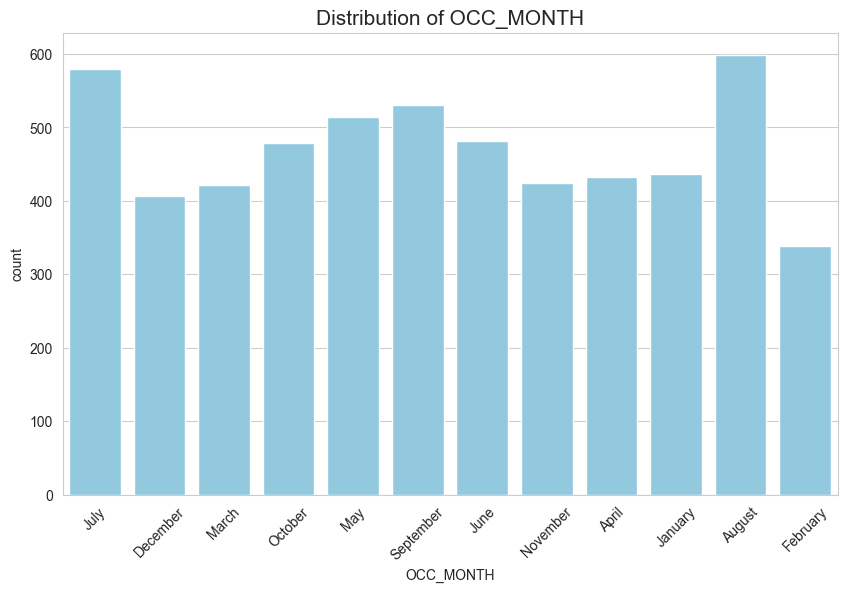

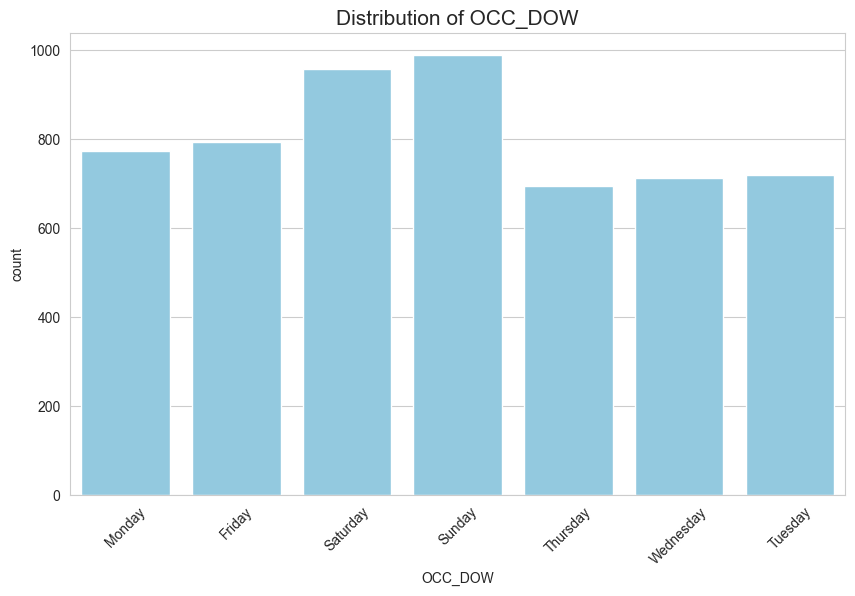

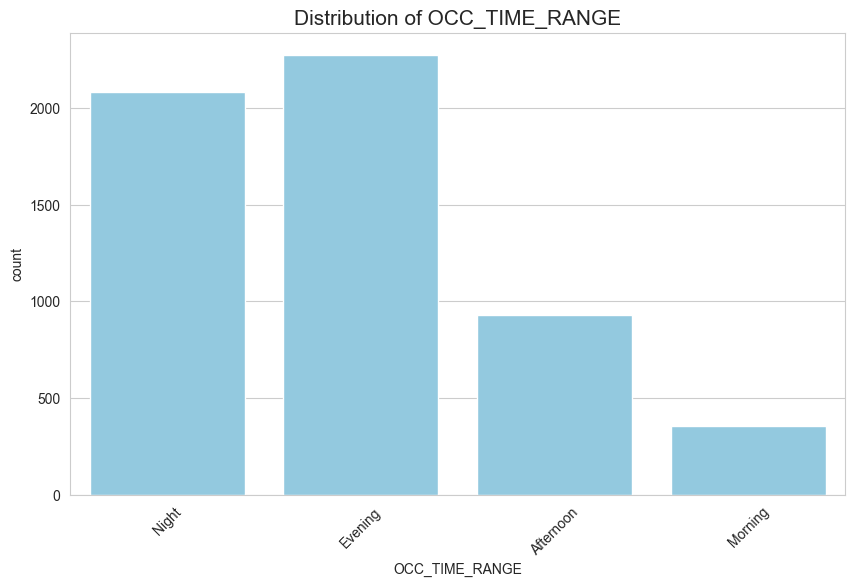

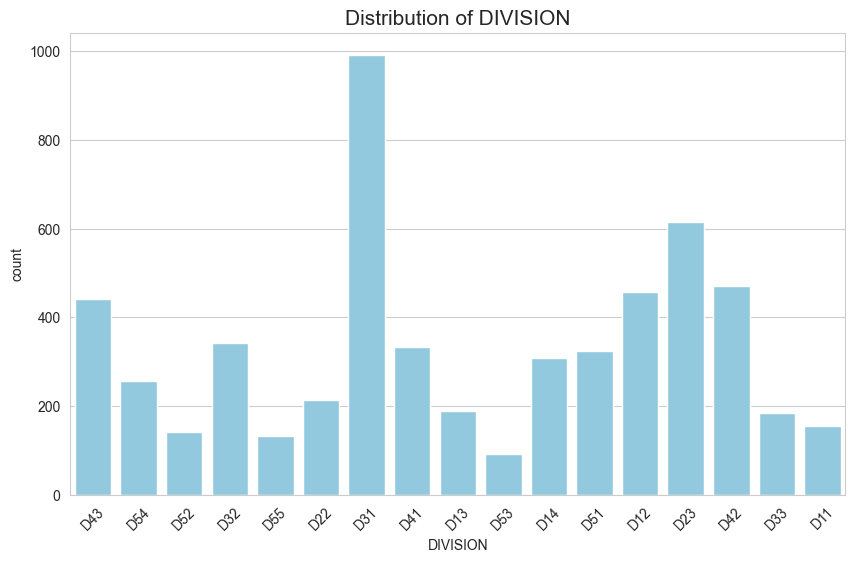

In [22]:
# Plot bar charts for categorical columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

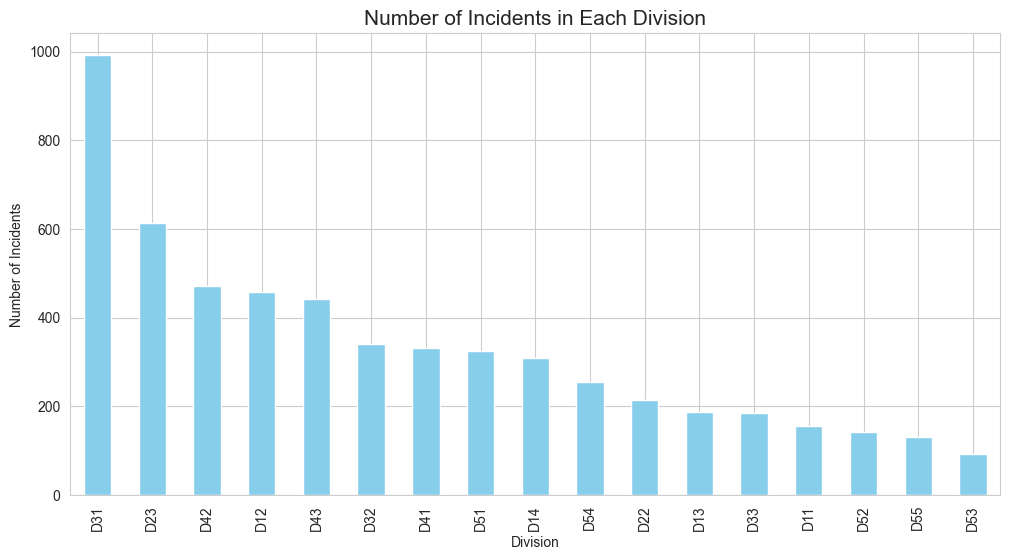

In [36]:
# Calculate the number of incidents in each division

division_counts = df['DIVISION'].value_counts()

# Plot the number of incidents in each division

plt.figure(figsize=(12, 6))
division_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Incidents in Each Division', fontsize=15)
plt.xlabel('Division')
plt.ylabel('Number of Incidents')
plt.show()

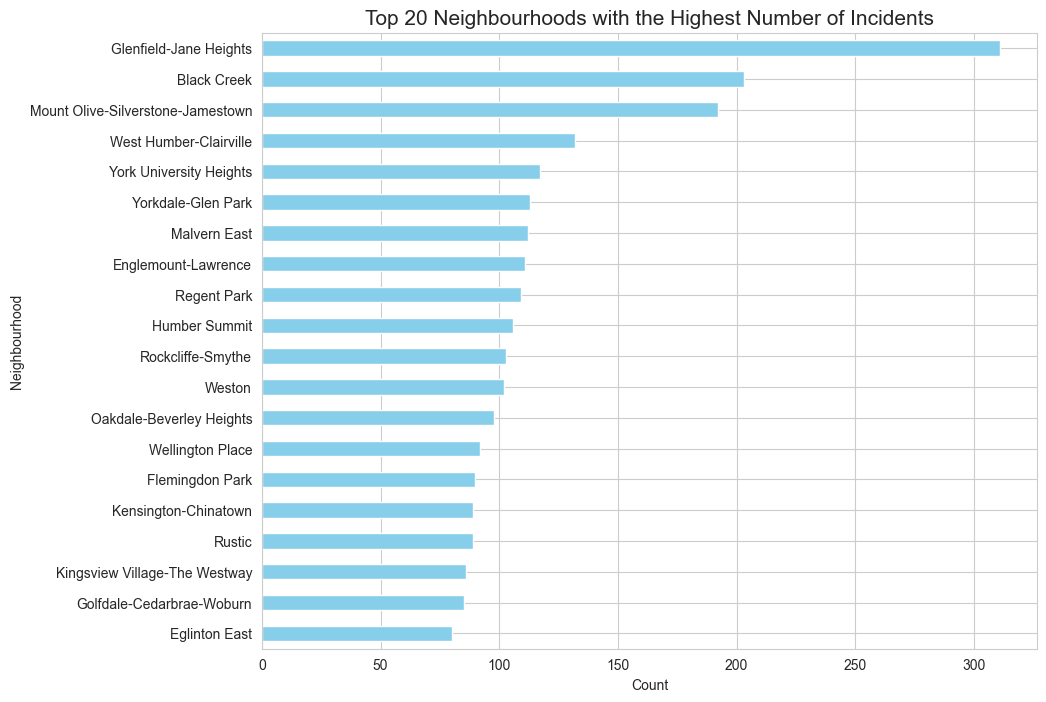

In [14]:
# Plot the top 20 neighbourhoods with the highest number of incidents

plt.figure(figsize=(10,8))
df['NEIGHBOURHOOD_158'].value_counts().head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Neighbourhoods with the Highest Number of Incidents', fontsize=15)
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.gca().invert_yaxis()
plt.show()

* OCC_MONTH: The number of firearm discharge incidents doesn't vary drastically across different months. However, there seems to be a slight increase in the incidents during the summer months (June, July, and August). This could be due to more outdoor activities during the warmer weather leading to more potential for incidents.

* OCC_DOW (Day of the Week): Incidents appear to be fairly evenly distributed across the days of the week. However, Friday seems to have slightly more incidents than other days, and Sunday seems to have fewer incidents.

* OCC_TIME_RANGE: The majority of firearm incidents occur at night, followed by the afternoon and evening. This aligns with the bimodal distribution we observed in the OCC_HOUR histogram.

* DIVISION: The incidents are not evenly distributed across divisions. Some divisions have a significantly higher number of incidents than others.

* NEIGHBOURHOOD_158: The number of incidents varies significantly across different neighborhoods. The bar chart shows the top 20 neighborhoods with the highest number of incidents.

Bivariate Analysis

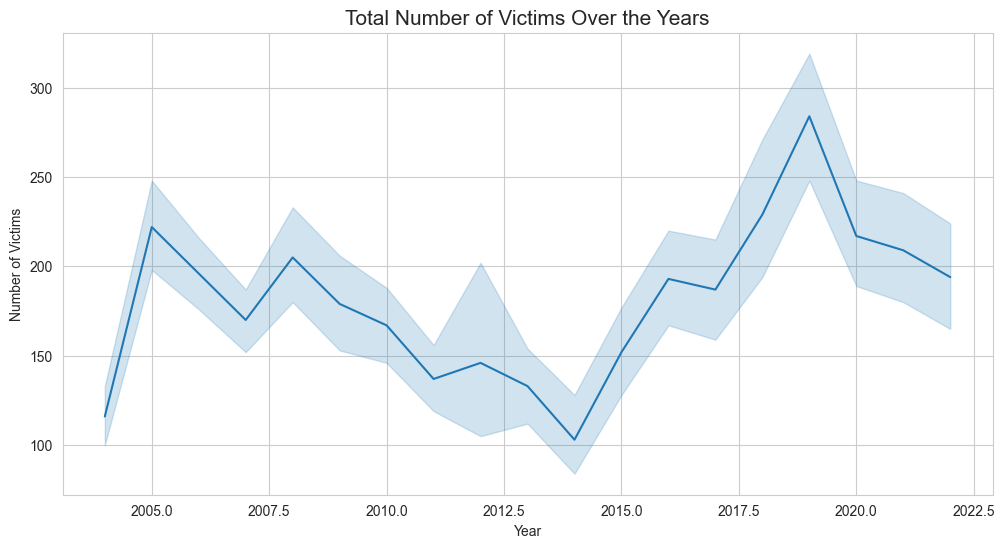

In [8]:
# Bivariate analysis: Number of victims over the years

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="OCC_YEAR", y="VICTIMS", estimator='sum')
plt.title('Total Number of Victims Over the Years', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.show()

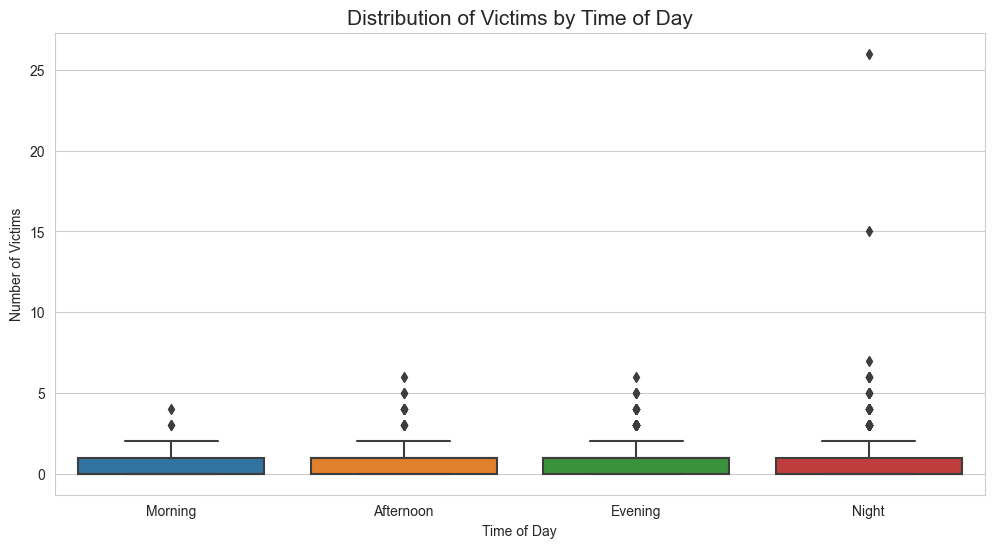

In [9]:
# Bivariate analysis: Number of victims by time of day

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="OCC_TIME_RANGE", y="VICTIMS", order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Distribution of Victims by Time of Day', fontsize=15)
plt.xlabel('Time of Day')
plt.ylabel('Number of Victims')
plt.show()

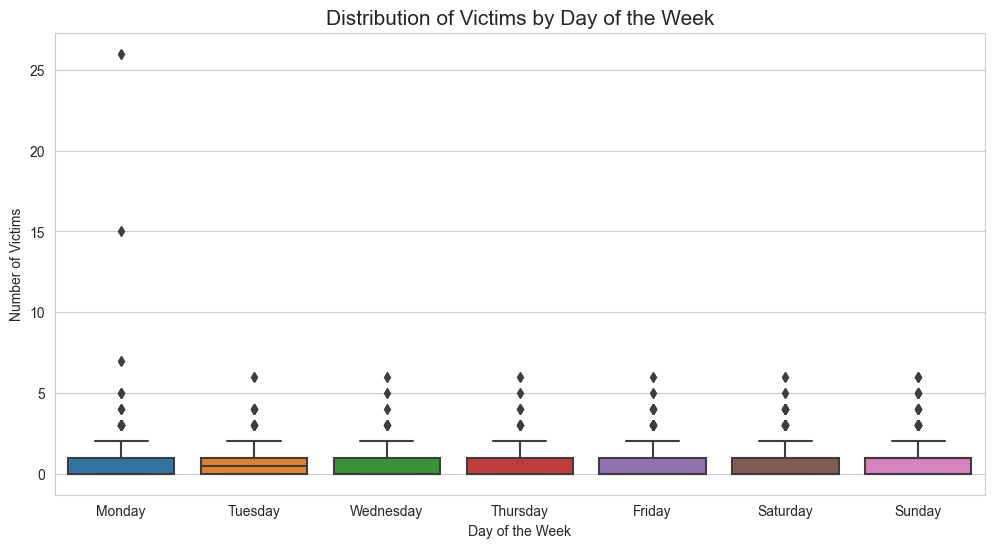

In [10]:
# Bivariate analysis: Number of victims by day of the week

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="OCC_DOW", y="VICTIMS", 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Victims by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Victims')
plt.show()


* Total Number of Victims Over the Years: The total number of victims from firearm incidents seems to have increased over the years, with noticeable peaks around 2005 and 2018.

* Distribution of Victims by Time of Day: The median number of victims tends to be the same (0) for different times of the day. However, the boxplot shows that the variability (represented by the size of the boxes and whiskers) is larger for the night, indicating that there are more incidents with a high number of victims during this time.

* Distribution of Victims by Day of the Week: The median number of victims is the same for all days of the week (0), but the variability differs. Fridays seem to have a wider range of victims compared to other days, indicating more severe incidents might occur on Fridays.

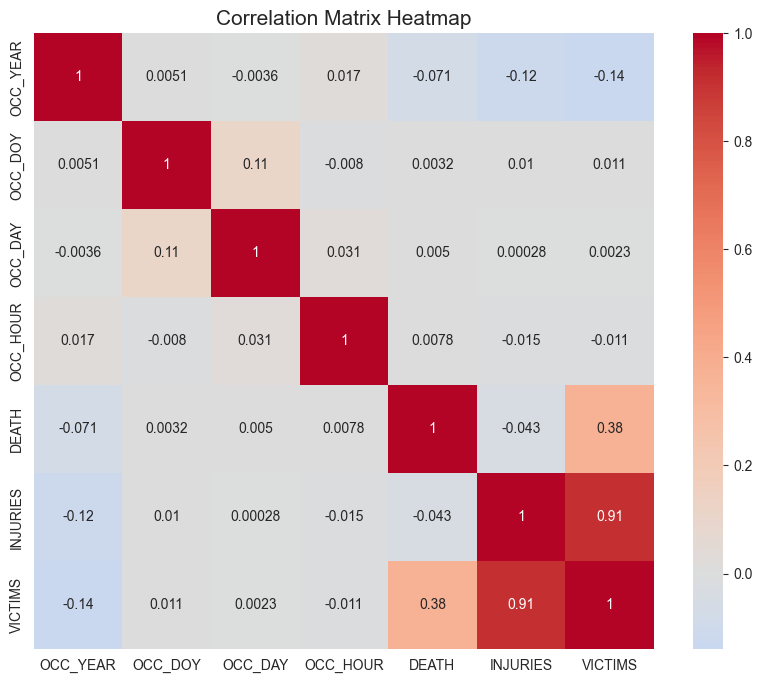

In [13]:
# Correlation among numerical variables

corr = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap', fontsize=15)
plt.show()

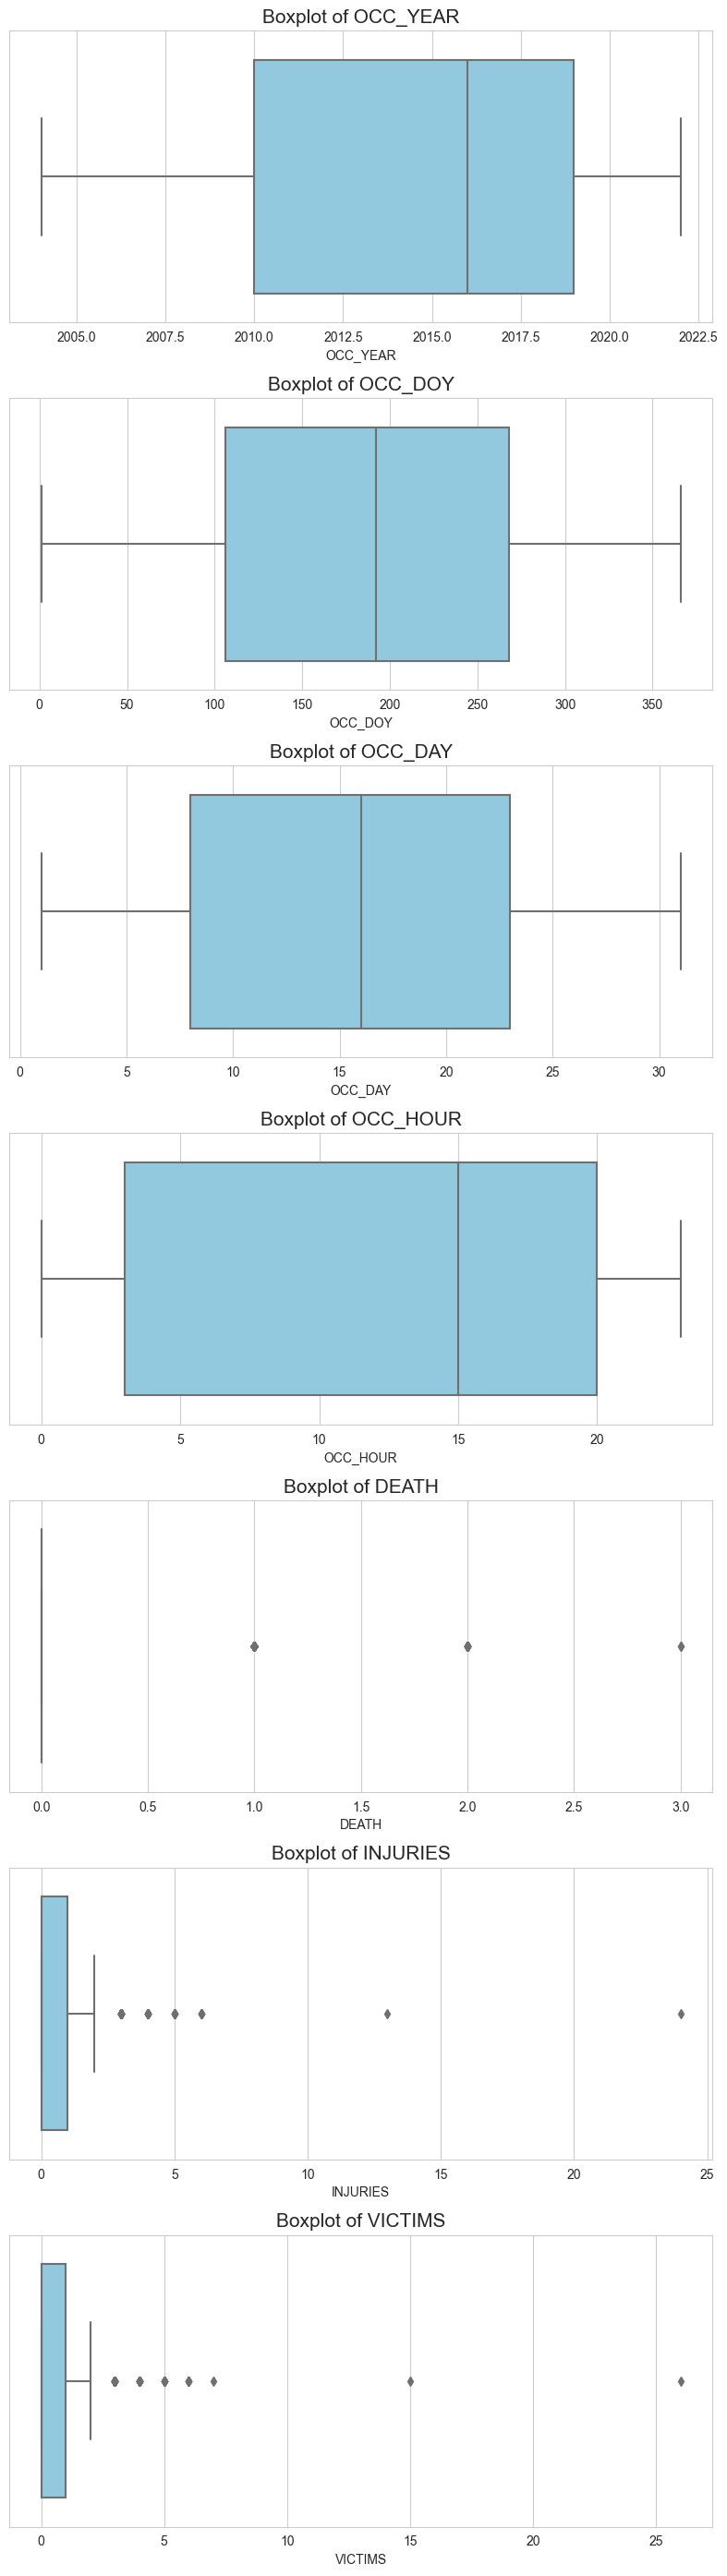

In [18]:
# Outlier detection using IQR

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

# Boxplots for outliers

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 4*len(numeric_columns)))
for col, ax in zip(numeric_columns, axes):
    sns.boxplot(data=df, x=col, ax=ax, color='skyblue')
    ax.set_title(f'Boxplot of {col}', fontsize=15)

plt.tight_layout()
plt.show()

In [9]:
# Function to calculate and plot skewness and kurtosis

def plot_skewness_kurtosis(df, column):
    
    # Calculate skewness and kurtosis

    skew_value = skew(df[column])
    kurtosis_value = kurtosis(df[column])

    # Plot the distribution, along with the skewness and kurtosis

    fig, axes = plt.subplots(2, 1, figsize=(12, 8))

    df[column].plot(kind='hist', bins=30, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {column}\nSkewness: {skew_value:.2f}', fontsize=15)

    df[column].plot(kind='hist', bins=30, ax=axes[1], color='skyblue')
    axes[1].set_title(f'Distribution of {column}\nKurtosis: {kurtosis_value:.2f}', fontsize=15)

    plt.tight_layout()
    plt.show()

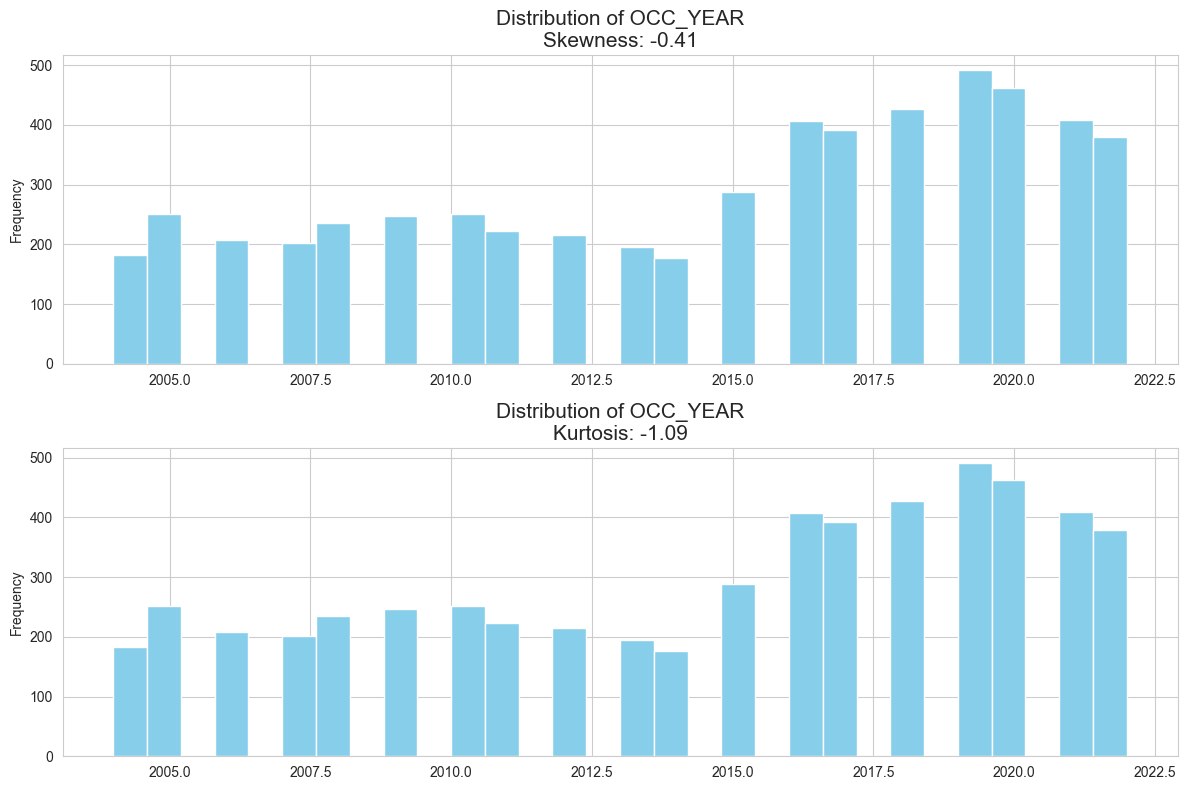

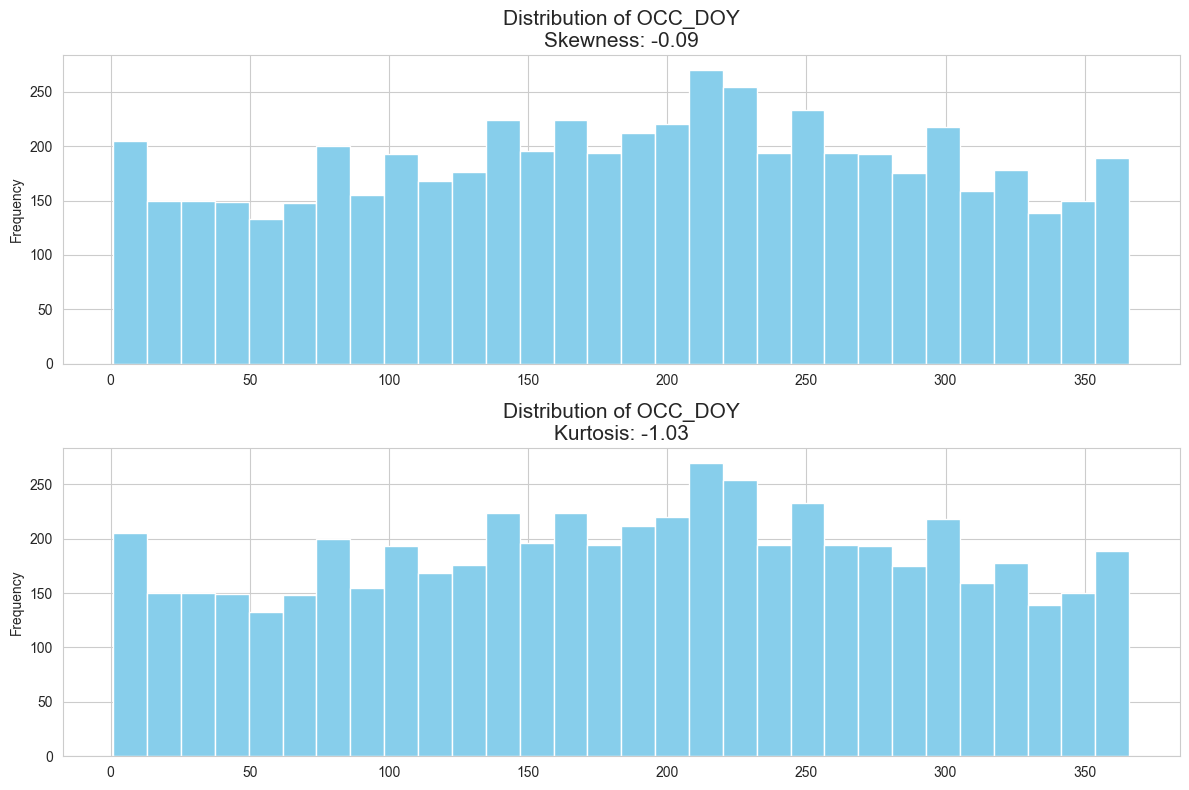

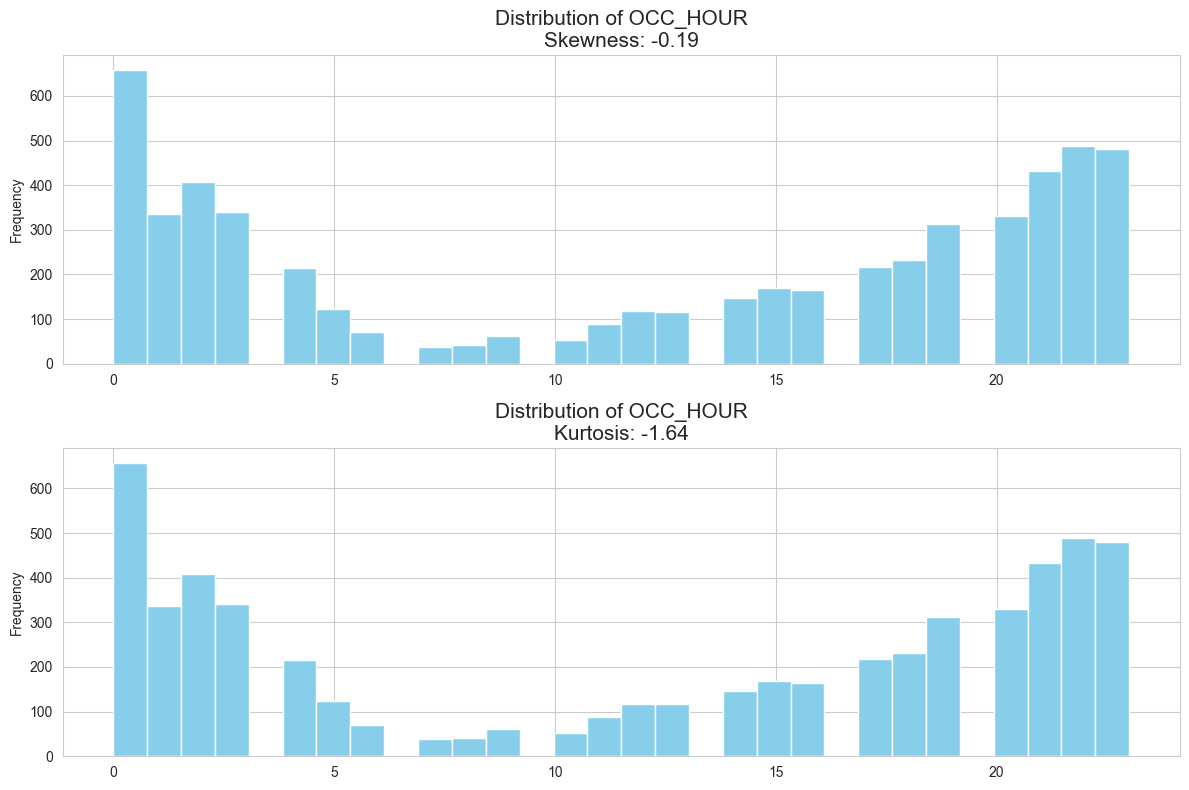

In [11]:
# Plot skewness and kurtosis 

numerical_columns = ['OCC_YEAR', 'OCC_DOY', 'OCC_HOUR']
for column in numerical_columns:
    plot_skewness_kurtosis(df, column)

* OCC_YEAR: The negative skewness indicates that there are slightly more incidents recorded in the later years in the dataset than in the earlier years. The negative kurtosis indicates that the distribution of incidents across years is relatively uniform, with fewer years having an unusually high or low number of incidents than would be expected in a normal distribution.

* OCC_DOY: The skewness near zero indicates that shooting incidents are roughly evenly distributed throughout the year. There doesn't seem to be a particular time of the year when incidents are significantly more or less likely to occur. The negative kurtosis suggests that the number of incidents is relatively consistent from day to day, with fewer days having an unusually high or low number of incidents.

* OCC_HOUR: The negative skewness suggests that slightly more incidents occur in the later hours of the day than in the earlier hours. This could potentially indicate that shooting incidents are more likely to occur at night, although further analysis would be needed to confirm this. The negative kurtosis suggests that the number of incidents is relatively consistent from hour to hour, with fewer hours having an unusually high or low number of incidents.

This can be further confirmed by creating pair-wise plots

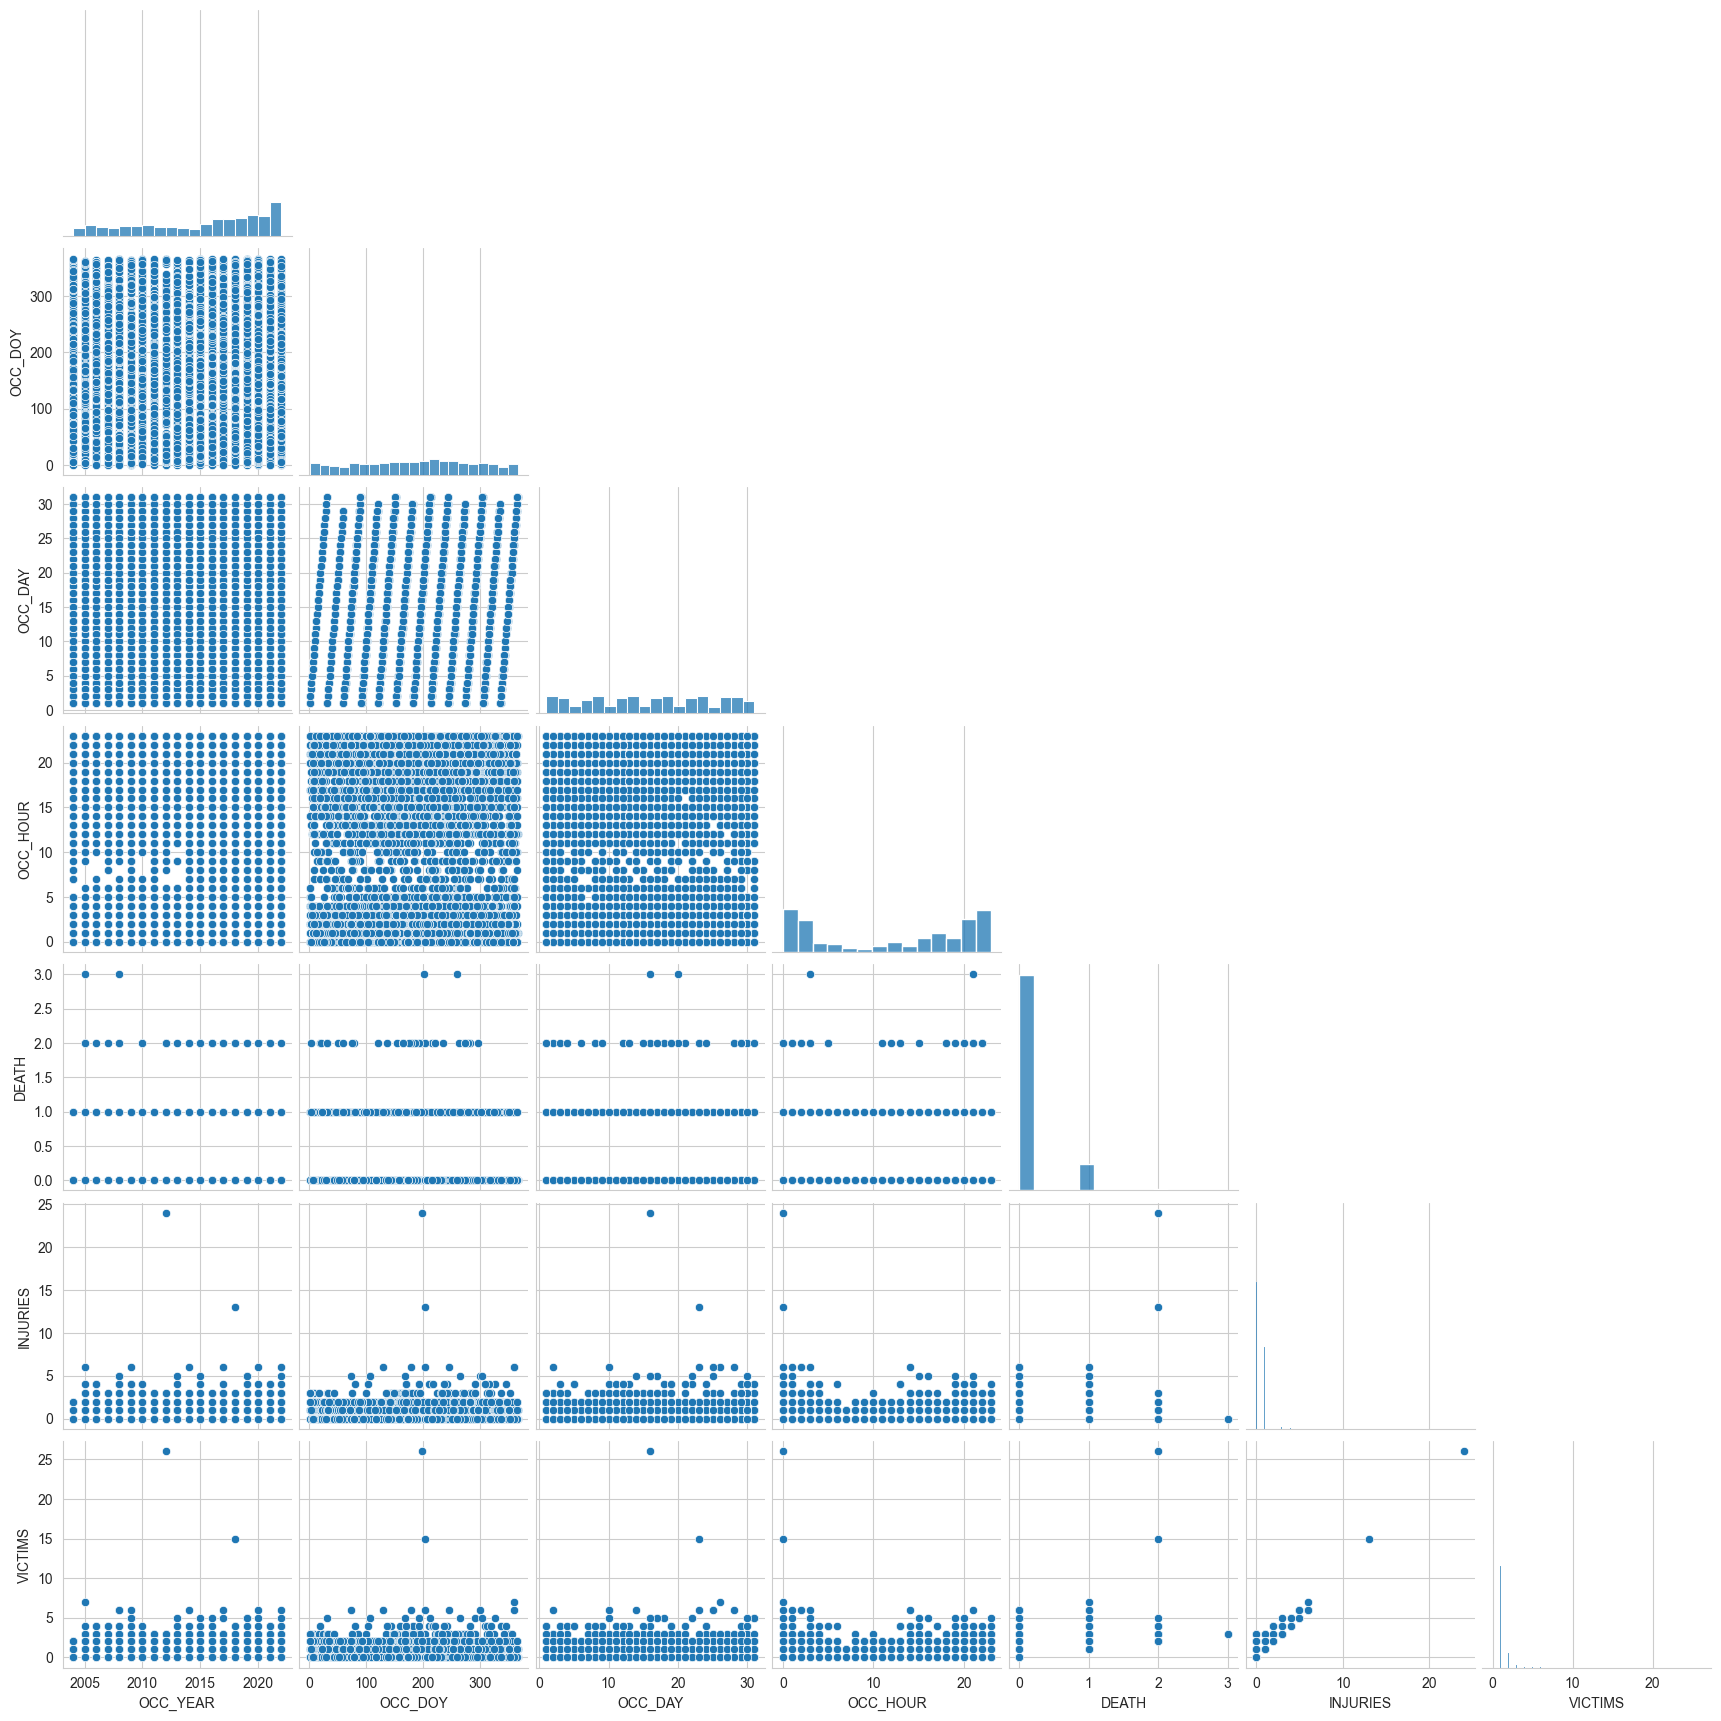

In [12]:
# Pairwise Relationships: Scatter plots of all pairs of numerical variables

sns.pairplot(df[numeric_columns], corner=True)
plt.show()

In [24]:
# Convert 'OCC_DATE' to datetime format

df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

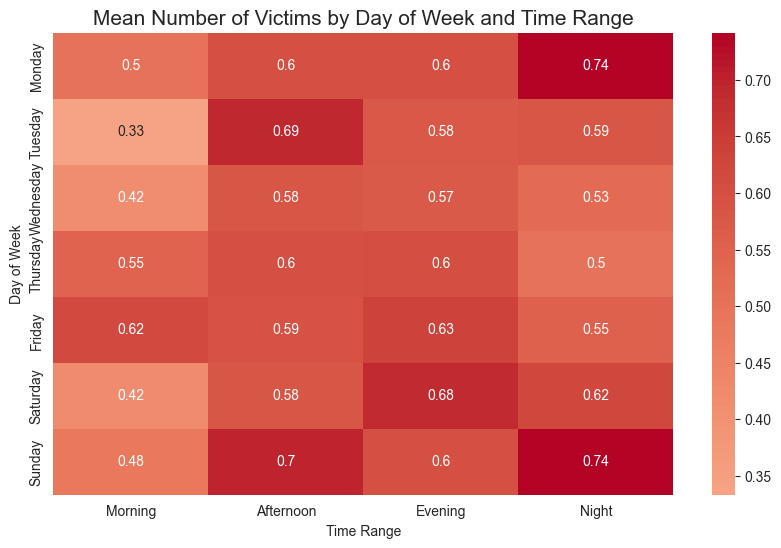

In [24]:
# Grouped Analysis: Mean number of victims by day of week and time range

grouped_analysis = df.groupby(['OCC_DOW', 'OCC_TIME_RANGE'])['VICTIMS'].mean().unstack()

# Reorder the index and columns to make the heatmap more interpretable

grouped_analysis = grouped_analysis.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
grouped_analysis = grouped_analysis[['Morning', 'Afternoon', 'Evening', 'Night']]

# Plot the heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_analysis, annot=True, cmap='coolwarm', center=0)
plt.title('Mean Number of Victims by Day of Week and Time Range', fontsize=15)
plt.xlabel('Time Range')
plt.ylabel('Day of Week')
plt.show()


In [25]:
# Cross Tabulation: Day of week and time range

cross_tab = pd.crosstab(df['OCC_DOW'], df['OCC_TIME_RANGE'])

# Reorder the index and columns to make the table more interpretable

cross_tab = cross_tab.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
cross_tab = cross_tab[['Morning', 'Afternoon', 'Evening', 'Night']]

cross_tab

# Shooting incidents

OCC_TIME_RANGE,Morning,Afternoon,Evening,Night
OCC_DOW,,,,
Monday,44,142,348,240
Tuesday,45,127,319,229
Wednesday,48,120,346,199
Thursday,53,108,321,213
Friday,42,157,326,268
Saturday,57,139,314,448
Sunday,66,139,301,484


<Figure size 2000x2000 with 0 Axes>

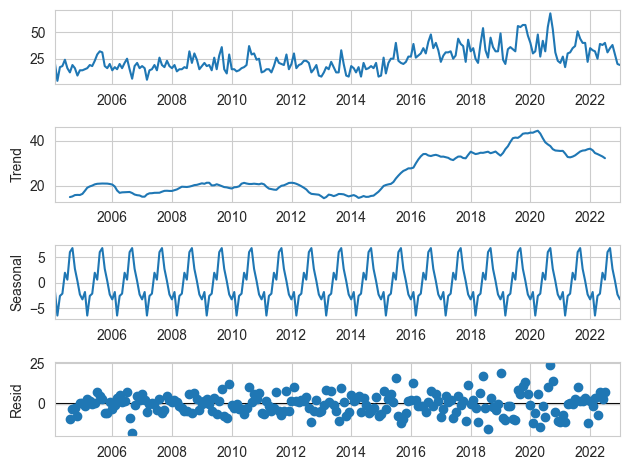

In [35]:
# Aggregate the number of incidents on a monthly basis

monthly_incidents = df.resample('M', on='OCC_DATE').size()

# Decompose the time series

decomposition = seasonal_decompose(monthly_incidents)

# Plot the original time series, trend, seasonality, and residuals

plt.figure(figsize=(20, 20))
decomposition.plot()
plt.show()

* The seasonality component suggests periodic pattern in the data, which is related to the time of the year. It suggests that there are certain times of the year when incidents are more frequent and certain times when they are less frequent. 

* The residuals, which represent the remaining information after the trend and seasonality have been removed, show some variability over time but don't exhibit a clear pattern,  indicating that most of the trend and seasonality have been captured, but there are still some variations that are not explained by these components